In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.rcParams.update({'font.size': 14})

Let's remember what mistakes were made with the credit scoring model.

Class 0 marks clients who will not repay the loan, and class 1 marks clients who will. The sample has no class imbalance, 5 objects with class 0 and 5 with class 1.

In [22]:
clients = [0, 0, 0, 0, 0,
           1, 1, 1, 1, 1]
first_model_pred = [0, 0, 1, 1, 1,
                    1, 1, 1, 1, 1]
second_model_pred = [0, 0, 0, 0, 0,
                     1, 1, 0, 0, 0]


df = pd.DataFrame({
    'clients': clients,
    'first_model': first_model_pred,
    'second_model': second_model_pred
})

df

,clients,first_model,second_model
0,0,0,0
1,0,0,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,1,1
6,1,1,1
7,1,1,0
8,1,1,0
9,1,1,0


#First Model

We can build this error matrix for our problem for the first model, it is available in sklearn in the metrics module and is called confusion_matrix.

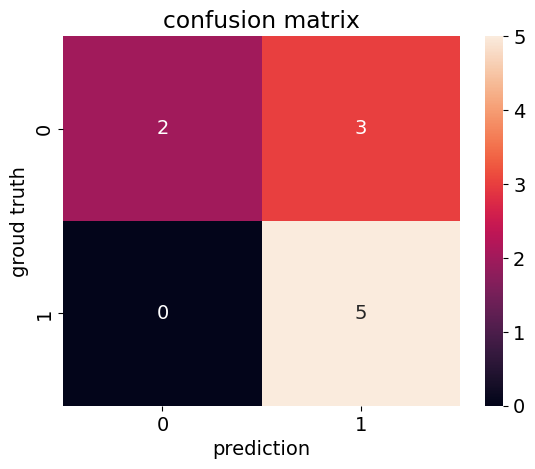

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df['clients'],
                      df['first_model'])
sns.heatmap(cm, annot=True)

plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('groud truth');

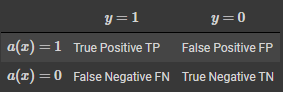

** Precision* is responsible for *classification purity*, calculated as true positives divided by all positives in general.
$$precision(a, X) = \frac{TP}{TP+FP}$$



Ideally, when the denominator is equal to the numerator, in which case the metric will equal 1. The precision metric minimizes **False Positive** errors, it is good if there are no such errors at all, then only the objects we need will be classified as the target class.


In [24]:
df[['clients', 'first_model']]

,clients,first_model
0,0,0
1,0,0
2,0,1
3,0,1
4,0,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [25]:
cm = confusion_matrix(df['clients'], df['first_model'])
tp = cm[1][1]
fp = cm[0][1]

precision_1_model = tp / (tp + fp)
precision_1_model

0.625

А теперь и с помощью функции precision_score из sklearn.

In [26]:
from sklearn.metrics import precision_score

precision_score(df['clients'], df['first_model'])

0.625

Метрика равна 0.625, мы верно классифицировали 5 объектов, а всего отнесли к первому классу 8 объектов, что и дало нам значение $\frac{5}{8} = 0.625$


#Second Model

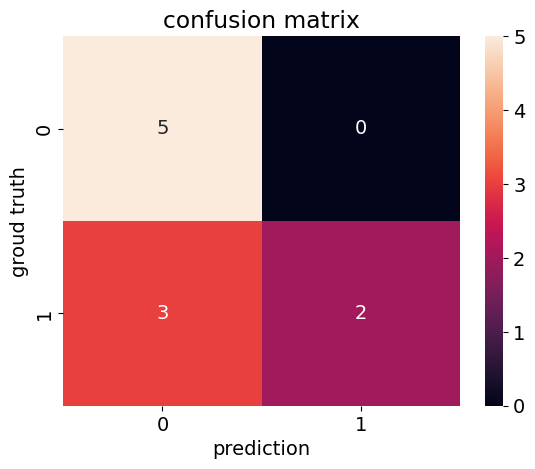

In [27]:
cm = confusion_matrix(df['clients'],
                      df['second_model'])
sns.heatmap(cm, annot=True)

plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('groud truth');

In [28]:
df[['clients', 'second_model']]

,clients,second_model
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,1,1
6,1,1
7,1,0
8,1,0
9,1,0


In [29]:
cm = confusion_matrix(df['clients'], df['second_model'])
tp = cm[1][1]
fp = cm[0][1]

precision_2_model = tp / (tp + fp)
precision_2_model

1.0

In [30]:
from sklearn.metrics import precision_score

precision_score(df['clients'], df['second_model'])

1.0

The metric is 1, we correctly classified two objects out of the two objects that the model assigned to class 1, we get precision = $\frac{2}{2} = 1$.

The second model wins on the precision metric, because it has no False Positive false positives, the model gives credits only to verified people, so it has a very clean classification performance.


 recall is responsible for the *number of classifications*, computed as the ratio of true positives to the total number of objects belonging to the target class


$$recall(a, X) = \frac{TP}{TP+FN}$$


Ideally, when the denominator is equal to the numerator, in which case the metric will equal 1. The recall metric minimizes **False Negative** errors, it is good when there are no such errors, then we will find all possible objects of the target class and won't miss anyone.

#first Model

In [31]:
df[['clients', 'first_model']]

,clients,first_model
0,0,0
1,0,0
2,0,1
3,0,1
4,0,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [32]:
cm = confusion_matrix(df['clients'], df['first_model'])
tp = cm[1][1]
fn = cm[1][0]

recall_1_model = tp / (tp + fn)
recall_1_model

1.0

In [33]:
from sklearn.metrics import recall_score

recall_score(df['clients'], df['first_model'])

1.0

The metric is equal to 1, we correctly assigned five objects out of five to class 1, that is, we found all the objects of the target class that we could, as a result we got a value equal to $\frac{5}{5} = 1$.

#Second Model


In [34]:
df[['clients', 'second_model']]

,clients,second_model
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,1,1
6,1,1
7,1,0
8,1,0
9,1,0


In [35]:
cm = confusion_matrix(df['clients'], df['second_model'])
tp = cm[1][1]
fn = cm[1][0]

recall_2_model = tp / (tp + fn)
recall_2_model

0.4

In [36]:
from sklearn.metrics import recall_score

recall_score(df['clients'], df['second_model'])

0.4

The metric is equal to 0.4, we correctly assigned only two objects to the target class out of five possible ones, i.e. we made 3 false negative errors and got the recall metric equal to $\frac{2}{5} = 0.4$.

Once again the models don't seem to be the same, their recall metrics are very different, now the first model looks more favorable as it has no  **False Negative**, the model gave loans to all verified people and left no one without money.

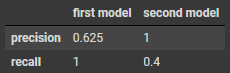

One has a good recall and the other has a good precision, so now we can look at the bank's strategy and decide what is more important to the bank:

If the bank wants to earn more, it is better to give loans to all people who are able to pay it back, i.e. we are looking for a model with maximum recall - and this is the first model.

If the bank wants to lose less, then it is better to lend only to reliable people, which means looking for a model with better precision - this is the second model.